<a href="https://colab.research.google.com/github/batuhancepni/Deeplearning-trainings/blob/main/reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import reuters

In [2]:
(train_data,train_labels), (test_data,test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [4]:
import numpy as np

In [5]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels),dimension))
  for i,label in enumerate(labels):
    results[i,label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
#from keras.utils.np_utils import to_categorical      ## The short way to create function you seen above.
#one_hot_train_labels = to_categorical(train_labels)
#one_hot_test_labels = to_categorical(test_labels)

In [9]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 58ms/step - loss: 2.6015 - accuracy: 0.5395 - val_loss: 1.7403 - val_accuracy: 0.6530
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.4106 - accuracy: 0.7122 - val_loss: 1.2970 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 1s 44ms/step - loss: 1.0444 - accuracy: 0.7798 - val_loss: 1.1279 - val_accuracy: 0.7610
Epoch 4/20
16/16 [==============================] - 1s 44ms/step - loss: 0.8182 - accuracy: 0.8281 - val_loss: 1.0167 - val_accuracy: 0.7910
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6536 - accuracy: 0.8638 - val_loss: 0.9542 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.5262 - accuracy: 0.8908 - val_loss: 0.9077 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 1s 43ms/step - loss: 0.4202 - accuracy: 0.9129 - val_loss: 0.8890 - val_accuracy: 0.8080
Epoch 8/20
16

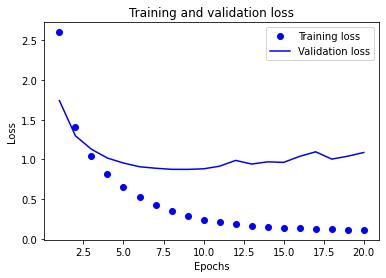

In [20]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

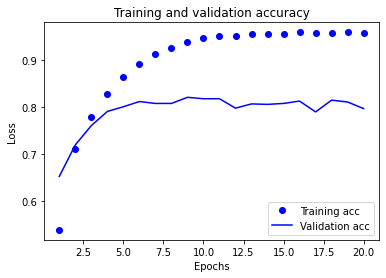

In [25]:
plt.clf()
acc_values = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
## After see the overfitting(at epoch=9), i changed epoch number to 9.

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
          results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 55ms/step - loss: 2.6370 - accuracy: 0.4743 - val_loss: 1.7667 - val_accuracy: 0.6760
Epoch 2/9
16/16 [==============================] - 1s 44ms/step - loss: 1.4007 - accuracy: 0.7224 - val_loss: 1.2866 - val_accuracy: 0.7240
Epoch 3/9
16/16 [==============================] - 1s 43ms/step - loss: 1.0312 - accuracy: 0.7835 - val_loss: 1.1201 - val_accuracy: 0.7610
Epoch 4/9
16/16 [==============================] - 1s 43ms/step - loss: 0.8186 - accuracy: 0.8266 - val_loss: 1.0258 - val_accuracy: 0.7800
Epoch 5/9
16/16 [==============================] - 1s 43ms/step - loss: 0.6521 - accuracy: 0.8637 - val_loss: 0.9654 - val_accuracy: 0.7910
Epoch 6/9
16/16 [==============================] - 1s 43ms/step - loss: 0.5220 - accuracy: 0.8928 - val_loss: 0.9417 - val_accuracy: 0.7980
Epoch 7/9
16/16 [==============================] - 1s 43ms/step - loss: 0.4241 - accuracy: 0.9148 - val_loss: 0.8866 - val_accuracy: 0.8090
Epoch 8/9
16/16 [===

In [27]:
results

[0.9629116058349609, 0.7911843061447144]

In [28]:
predictions = model.predict(x_test)